In this project we will be performing both classification and regression to predict both gender and age respectively


##important the libaray

In [3]:
# Import necessary modules first
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip '/content/drive/MyDrive/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [6]:
BASE_DIR = '/content/UTKFace'
age_labels = []
gender_labels = []
image_paths = []

image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(BASE_DIR, image)
  img_components = image.split('_')
  age_label = int(img_components[0])
  gender_label = int(img_components[1])

  # Append the image_path, age_label, and gender_label
  image_paths.append(image_path)
  age_labels.append(age_label)
  gender_labels.append(gender_label)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [7]:
print(f"Number of age_labels: {len(age_labels)}")
print(f"Number of gender_labels: {len(gender_labels)}")
print(f"Number of image_paths: {len(image_paths)}")

Number of age_labels: 23708
Number of gender_labels: 23708
Number of image_paths: 23708


In [8]:
gender_mapping = {0: 'Male', 1: 'Female'}

In [9]:
import pandas as pd
df = pd.DataFrame()
df['image_path'] = image_paths
df['age'] = age_labels
df['gender'] = gender_labels
df.head()

image_path  age  gender
0  /content/UTKFace/45_0_0_20170117152339171.jpg....   45       0
1  /content/UTKFace/45_0_0_20170117172129436.jpg....   45       0
2  /content/UTKFace/25_0_1_20170116003121821.jpg....   25       0
3  /content/UTKFace/42_0_0_20170117185738076.jpg....   42       0
4  /content/UTKFace/32_0_3_20170104232607114.jpg....   32       0

##Exploratory Data Analysis

Text(0.5, 1.0, 'Age: 15 | Gender: Female')

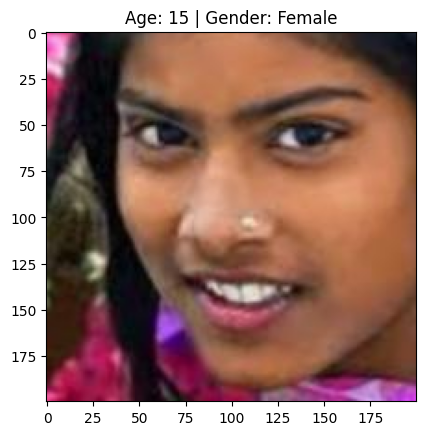

In [10]:
from PIL import Image

rand_index = random.randint(0, len(image_paths))
age = df['age'][rand_index]
gender = df['gender'][rand_index]
image_path = df['image_path'][rand_index]

img = load_img(image_path)
plt.imshow(img)
plt.title(f"Age: {age} | Gender: {gender_mapping[gender]}")

<Axes: xlabel='age', ylabel='Density'>

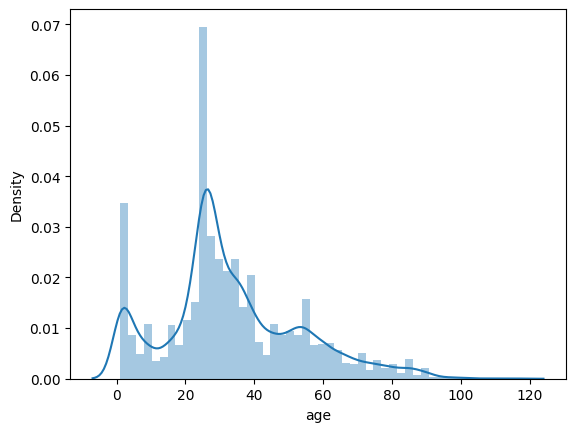

In [11]:
# Age distribution
sns.distplot(df['age'])

The distribution roughly follows a normal distribution that is slightly skewed to the right with a median of around 27 years. The range is from 0 to 120 years. There are some outliers at the higher end of the distribution.

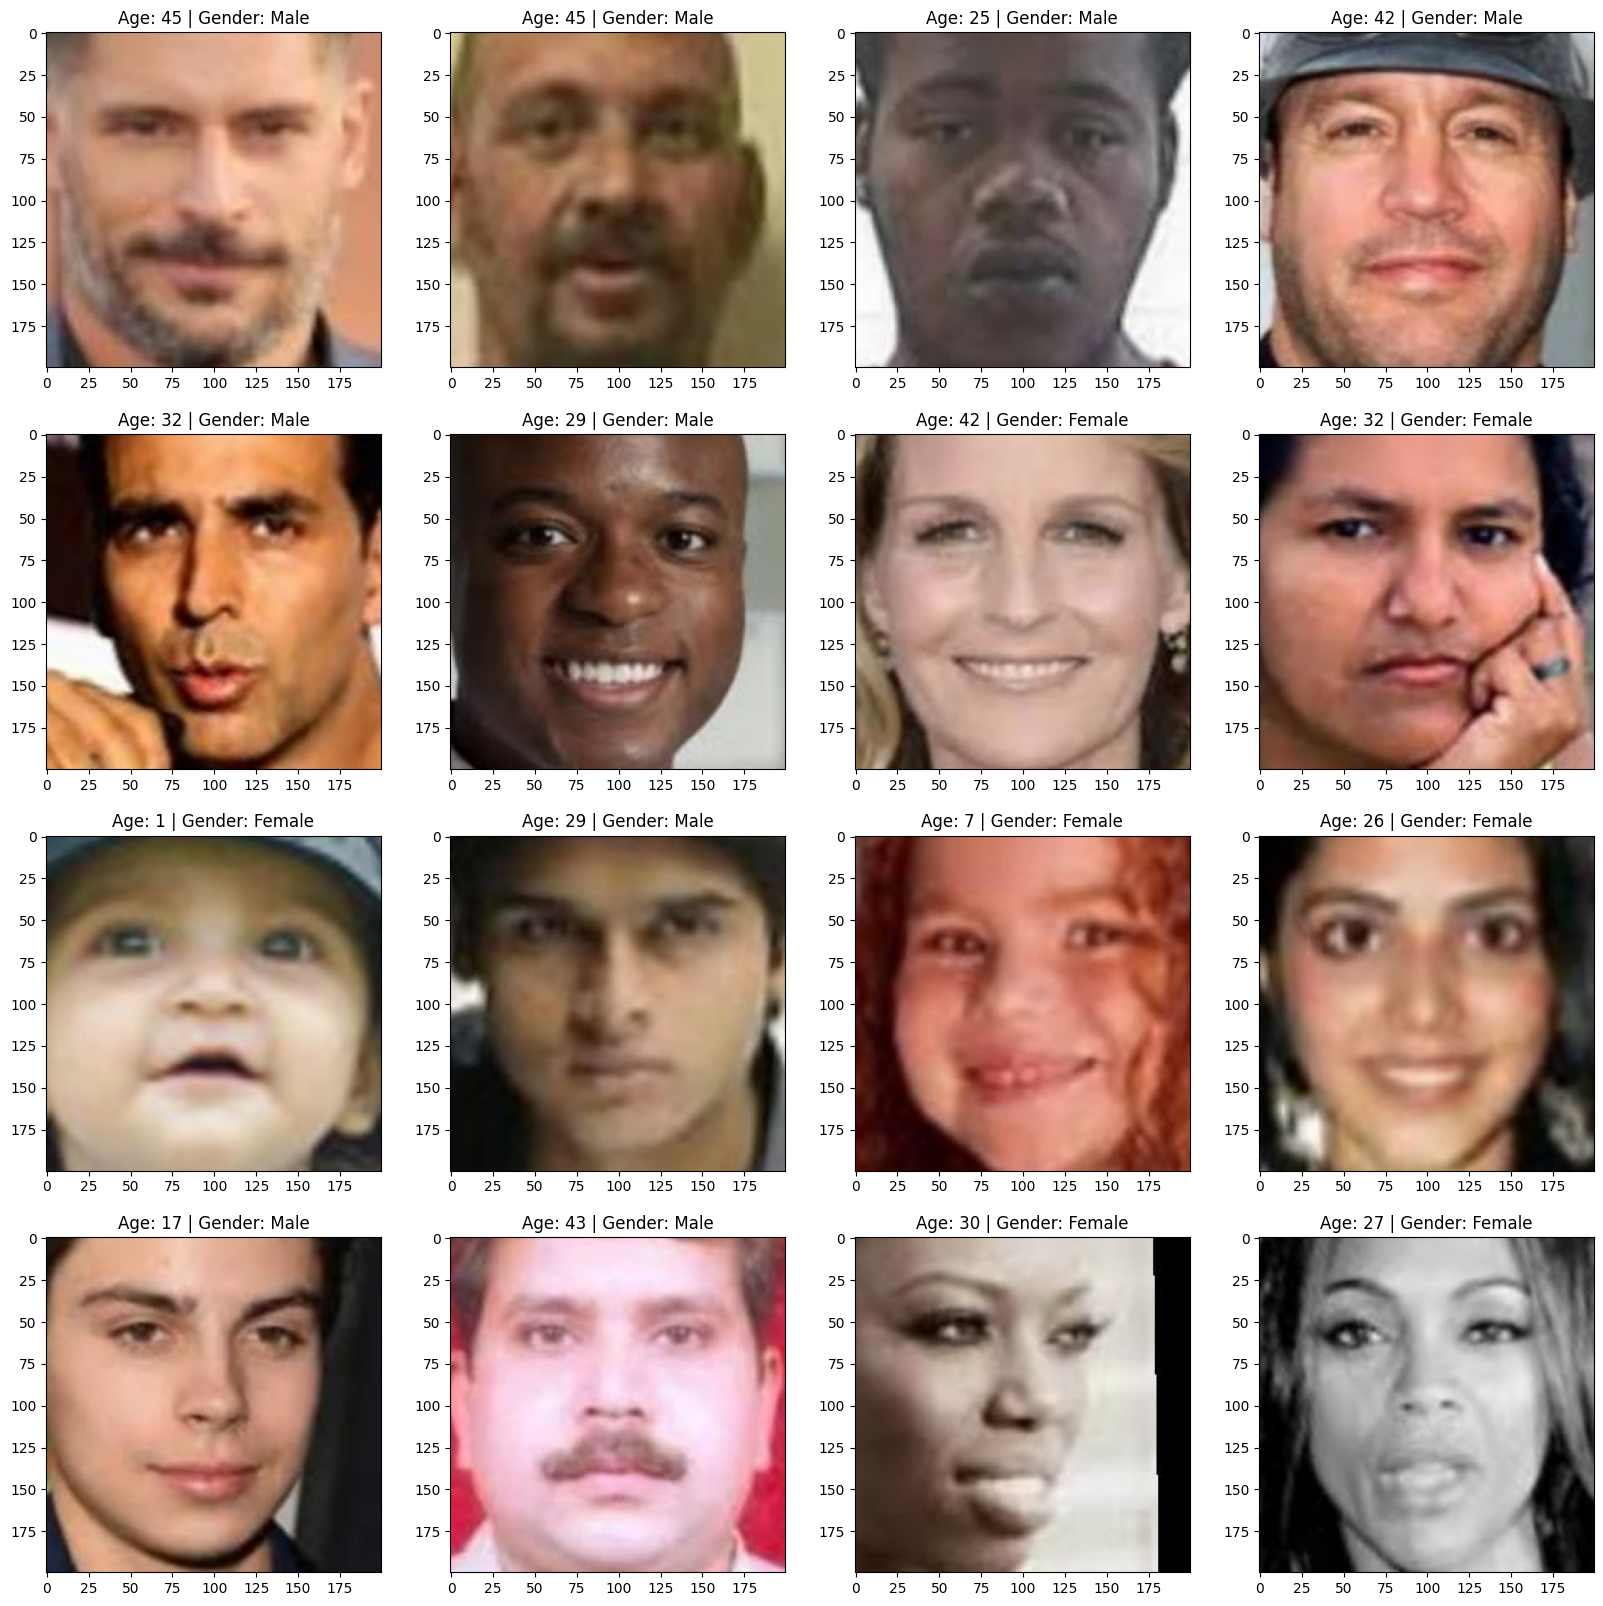

In [12]:
plt.figure(figsize=(20, 20))
samples = df.iloc[0:16]

for index, sample, age, gender in samples.itertuples():
  plt.subplot(4, 4, index+1)
  img = load_img(sample)
  plt.imshow(img)
  plt.title(f"Age: {age} | Gender: {gender_mapping[gender]}")

##Feature Extraction

In [13]:
import os

for image in df['image_path']:
    if not os.path.exists(image):
        print(f"Image not found: {image}")

In [14]:
def extract_image_features(images):
    features = list()

    for idx, image in enumerate(tqdm(images)):
        try:
            img = load_img(image, color_mode="grayscale")
            img = img.resize((128, 128), Image.ANTIALIAS)
            img = np.array(img)
            features.append(img)

            if idx % 100 == 0:  # Print progress every 100 images
                print(f"Processed {idx + 1}/{len(images)} images")

        except Exception as e:
            print(f"Error processing image {image}: {e}")

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)

    return features

In [15]:
X = extract_image_features(df['image_path'])

  0%|          | 0/23708 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Error processing image /content/UTKFace/28_0_1_20170113161017373.jpg.chip.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error processing image /content/UTKFace/45_0_0_20170117144436643.jpg.chip.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error processing image /content/UTKFace/55_0_3_20170119155052371.jpg.chip.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error processing image /content/UTKFace/24_0_1_20170116220224657 .jpg.chip.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error processing image /content/UTKFace/1_1_4_20161221202135073.jpg.chip.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error processing image /content/UTKFace/28_1_0_20170109141748286.jpg.chip.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error processing image /content/UTKFace/30_0_1_20170117194500557.jpg.chip.jpg: module 'PIL.Image' has no attribute 'ANTIALIAS'
Error processing image /content/UTKFace/26_1_0_2017011710360

In [16]:
print(X.shape)

(0, 128, 128, 1)


In [17]:
X = X/255.0

In [18]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [19]:
input_shape = (128, 128, 1)

In [20]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2,2))(conv_4)

flatten = Flatten()(max_4)

#fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='linear', name='age_output')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy','mae'],
              optimizer='adam', metrics=['accuracy'])


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
import cv2 # import cv2 for image processing


# Assuming you have a list of image file paths in 'image_paths':
X = []
for image_path in image_paths:
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Assuming grayscale images
    img = cv2.resize(img, (128, 128))  # Resize to match input_shape
    img = img.reshape(128, 128, 1)  # Reshape to add channel dimension
    X.append(img)
X = np.array(X)

# ... (Your previous code for defining 'y_gender', 'y_age') ...

# Verify shapes before splitting
print("Shape of X:", X.shape)
print("Shape of y_gender:", y_gender.shape)
print("Shape of y_age:", y_age.shape)

# Split the data into training and validation sets
X_train, X_val, y_gender_train, y_gender_val, y_age_train, y_age_val = train_test_split(
    X, y_gender, y_age, test_size=0.2, random_state=42
)

Shape of X: (23708, 128, 128, 1)
Shape of y_gender: (23708,)
Shape of y_age: (23708,)


In [26]:
model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam',
              metrics=[['accuracy'],['mae']])

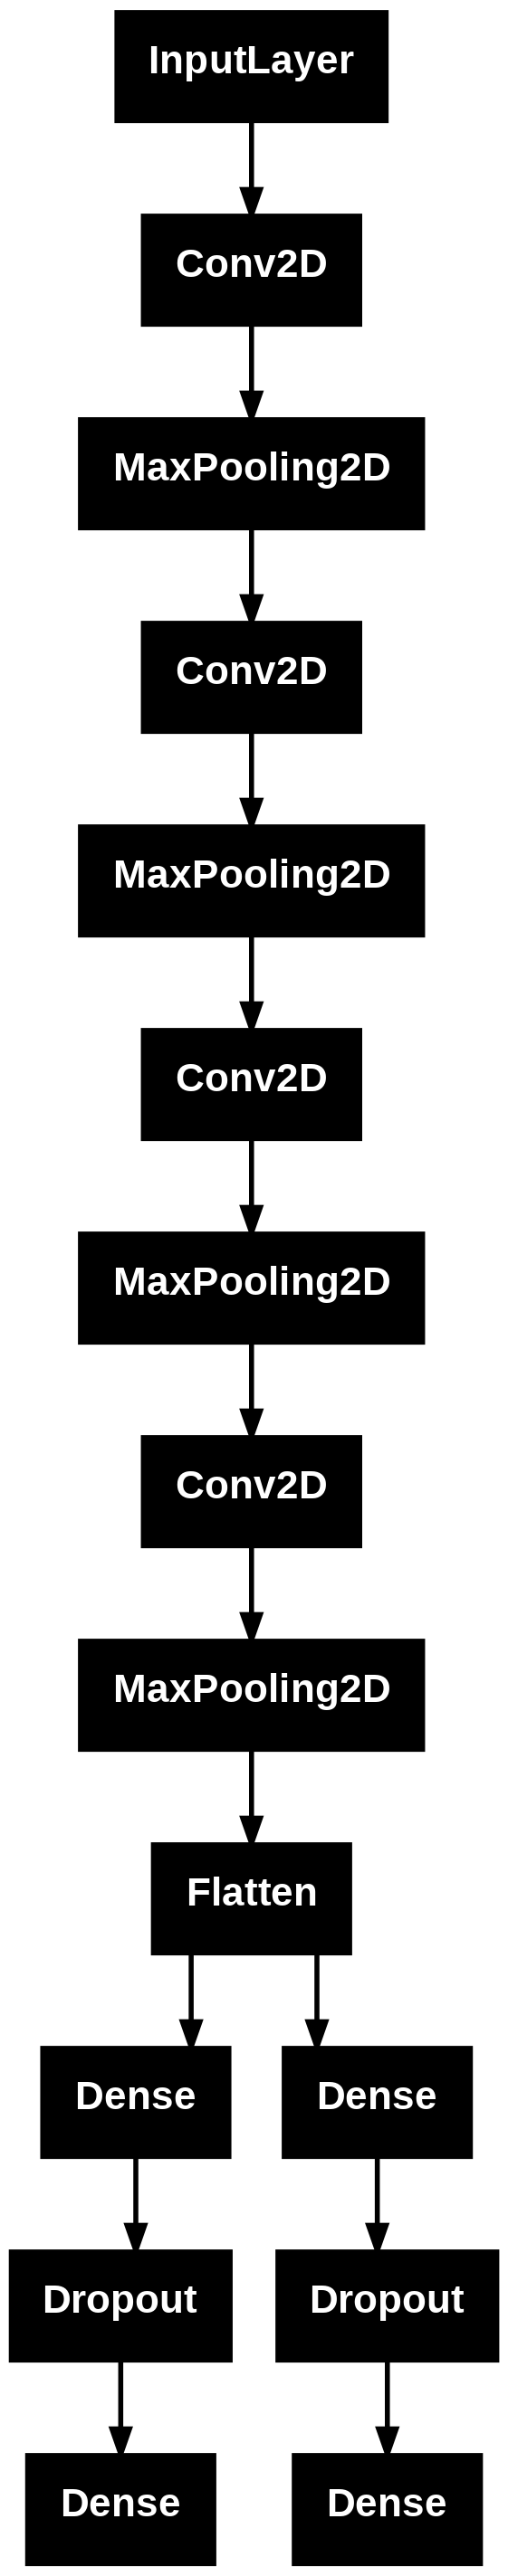

In [27]:
#plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [28]:
history = model.fit(x=X_train, y=[y_gender_train, y_age_train],
                    validation_data=(X_val, [y_gender_val, y_age_val]),
                    batch_size=32, epochs=50)

Epoch 1/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - age_output_mae: 19.4322 - gender_output_accuracy: 0.6356 - loss: 20.8906 - val_age_output_mae: 10.6080 - val_gender_output_accuracy: 0.8172 - val_loss: 11.0083
Epoch 2/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - age_output_mae: 11.0830 - gender_output_accuracy: 0.7995 - loss: 11.5127 - val_age_output_mae: 10.3211 - val_gender_output_accuracy: 0.8338 - val_loss: 10.6900
Epoch 3/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - age_output_mae: 10.0033 - gender_output_accuracy: 0.8162 - loss: 10.3971 - val_age_output_mae: 9.0858 - val_gender_output_accuracy: 0.8395 - val_loss: 9.4254
Epoch 4/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - age_output_mae: 8.9546 - gender_output_accuracy: 0.8346 - loss: 9.3152 - val_age_output_mae: 9.0176 - val_gender_output_accuracy: 0.8520 - val_loss: 9.3502
Epoch 5/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - age_output_mae: 8.4076 - gender_output_accuracy: 0.8442 - loss: 8.7529 - val_age_outpu

<Figure size 640x480 with 0 Axes>

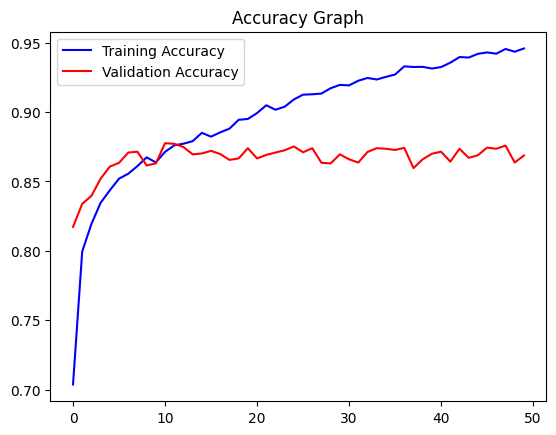

<Figure size 640x480 with 0 Axes>

In [29]:
#plot result for gender
acc = history.history['gender_output_accuracy']
val_acc = history.history['val_gender_output_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

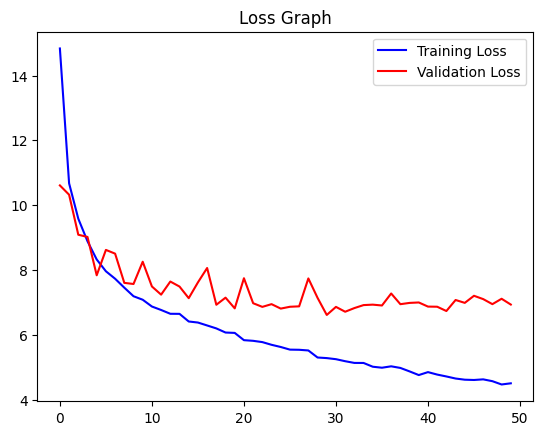

In [30]:
#plot result for loss
loss = history.history['age_output_mae']
val_loss = history.history['val_age_output_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

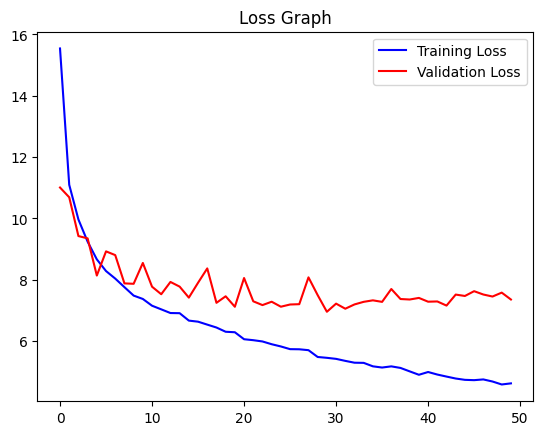

In [31]:
#plot results for age
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

##Prediction with test data

In [35]:
def get_image_features(image):
    img = load_img(image, color_mode="grayscale")
    img = img.resize((128, 128), Image.Resampling.LANCZOS)
    img = np.array(img)
    img = img.reshape(1, 128, 128, 1)
    img = img/255.0
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


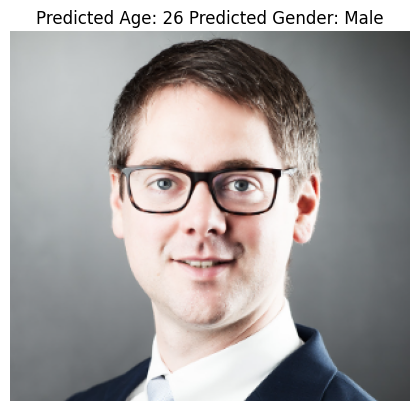

In [36]:
img_to_test = '/content/Screenshot 2024-10-16 161818.png'
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round(pred[1][0][0])

plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


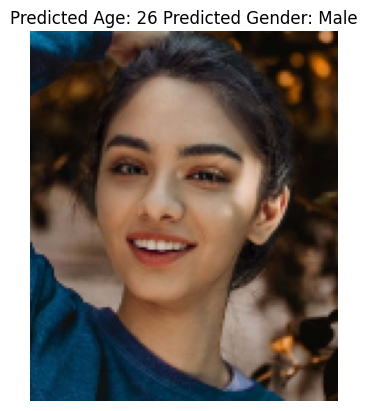

In [37]:
img_to_test = '/content/Screenshot 2024-10-16 161845.png'
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round(pred[1][0][0])

plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

In [46]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(128, 128)):
    # Load the image
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')
    img = img_to_array(img)  # Convert to array

    # Normalize pixel values
    img = img / 255.0

    # Expand dimensions to match the model's input shape
    img = np.expand_dims(img, axis=0)

    return img

image_path = '/content/Screenshot 2024-10-16 161845.png'  # Replace with the path to your image
preprocessed_image = preprocess_image(image_path)

In [47]:
# Predict using the trained model
gender_pred, age_pred = model.predict(preprocessed_image)

# Gender Prediction (0 for female, 1 for male, as the final layer is 'sigmoid')
gender = "Male" if gender_pred[0] > 0.5 else "Female"

# Age Prediction (this is a regression output, so it's a numerical value)
# Extract the scalar value from the array
age = age_pred[0][0]

print(f"Predicted Gender: {gender}")
print(f"Predicted Age: {age:.1f} years")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Gender: Female
Predicted Age: 26.0 years


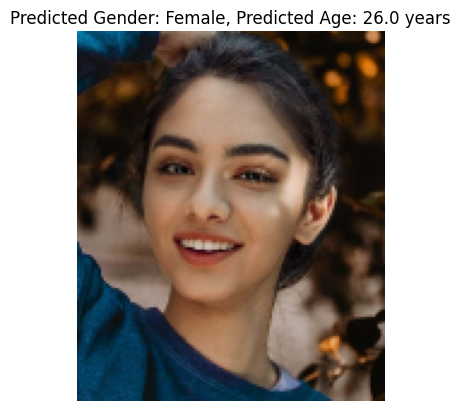

In [48]:
import matplotlib.pyplot as plt
from PIL import Image

# Display the image
img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Predicted Gender: {gender}, Predicted Age: {age:.1f} years")
plt.axis('off')
plt.show()